# import libraries


In [108]:

import pandas as pd

import numpy as np

import seaborn as sns


In [109]:
df = pd.read_csv("Student_performance.csv")
df.head()

,is_male,age,ethnicity,parental_level_of_education,Mjob,Fjob,studytime,has_standard_lunch,has_completed_preparation_test,internet,reading_score,math_score,has_passed_writing_exam
0,False,18,group D,2,at_home,teacher,2,True,True,no,70,59,1
1,True,17,group D,5,at_home,other,2,True,False,yes,93,96,1
2,False,15,group D,2,at_home,other,2,False,False,yes,76,57,1
3,True,15,group B,2,health,services,3,False,False,yes,70,70,1
4,False,16,group D,5,other,other,2,True,False,no,85,83,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_male                         1000 non-null   bool  
 1   age                             1000 non-null   int64 
 2   ethnicity                       1000 non-null   object
 3   parental_level_of_education     1000 non-null   int64 
 4   Mjob                            1000 non-null   object
 5   Fjob                            1000 non-null   object
 6   studytime                       1000 non-null   int64 
 7   has_standard_lunch              1000 non-null   bool  
 8   has_completed_preparation_test  1000 non-null   bool  
 9   internet                        1000 non-null   object
 10  reading_score                   1000 non-null   int64 
 11  math_score                      1000 non-null   int64 
 12  has_passed_writing_exam         1000 non-null   i

In [111]:
df.isnull().sum()

is_male                           0
age                               0
ethnicity                         0
parental_level_of_education       0
Mjob                              0
Fjob                              0
studytime                         0
has_standard_lunch                0
has_completed_preparation_test    0
internet                          0
reading_score                     0
math_score                        0
has_passed_writing_exam           0
dtype: int64

In [112]:
df.head(0)

,is_male,age,ethnicity,parental_level_of_education,Mjob,Fjob,studytime,has_standard_lunch,has_completed_preparation_test,internet,reading_score,math_score,has_passed_writing_exam


<Axes: >

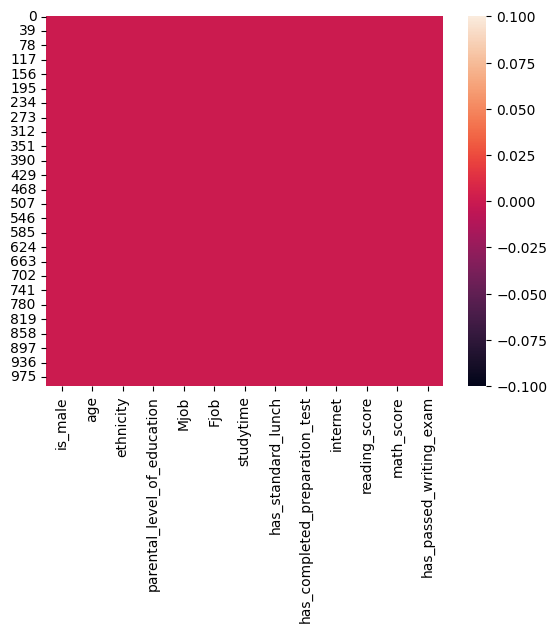

In [113]:
sns.heatmap(df.isna())

In [7]:
import missingno as msno 

<Axes: >

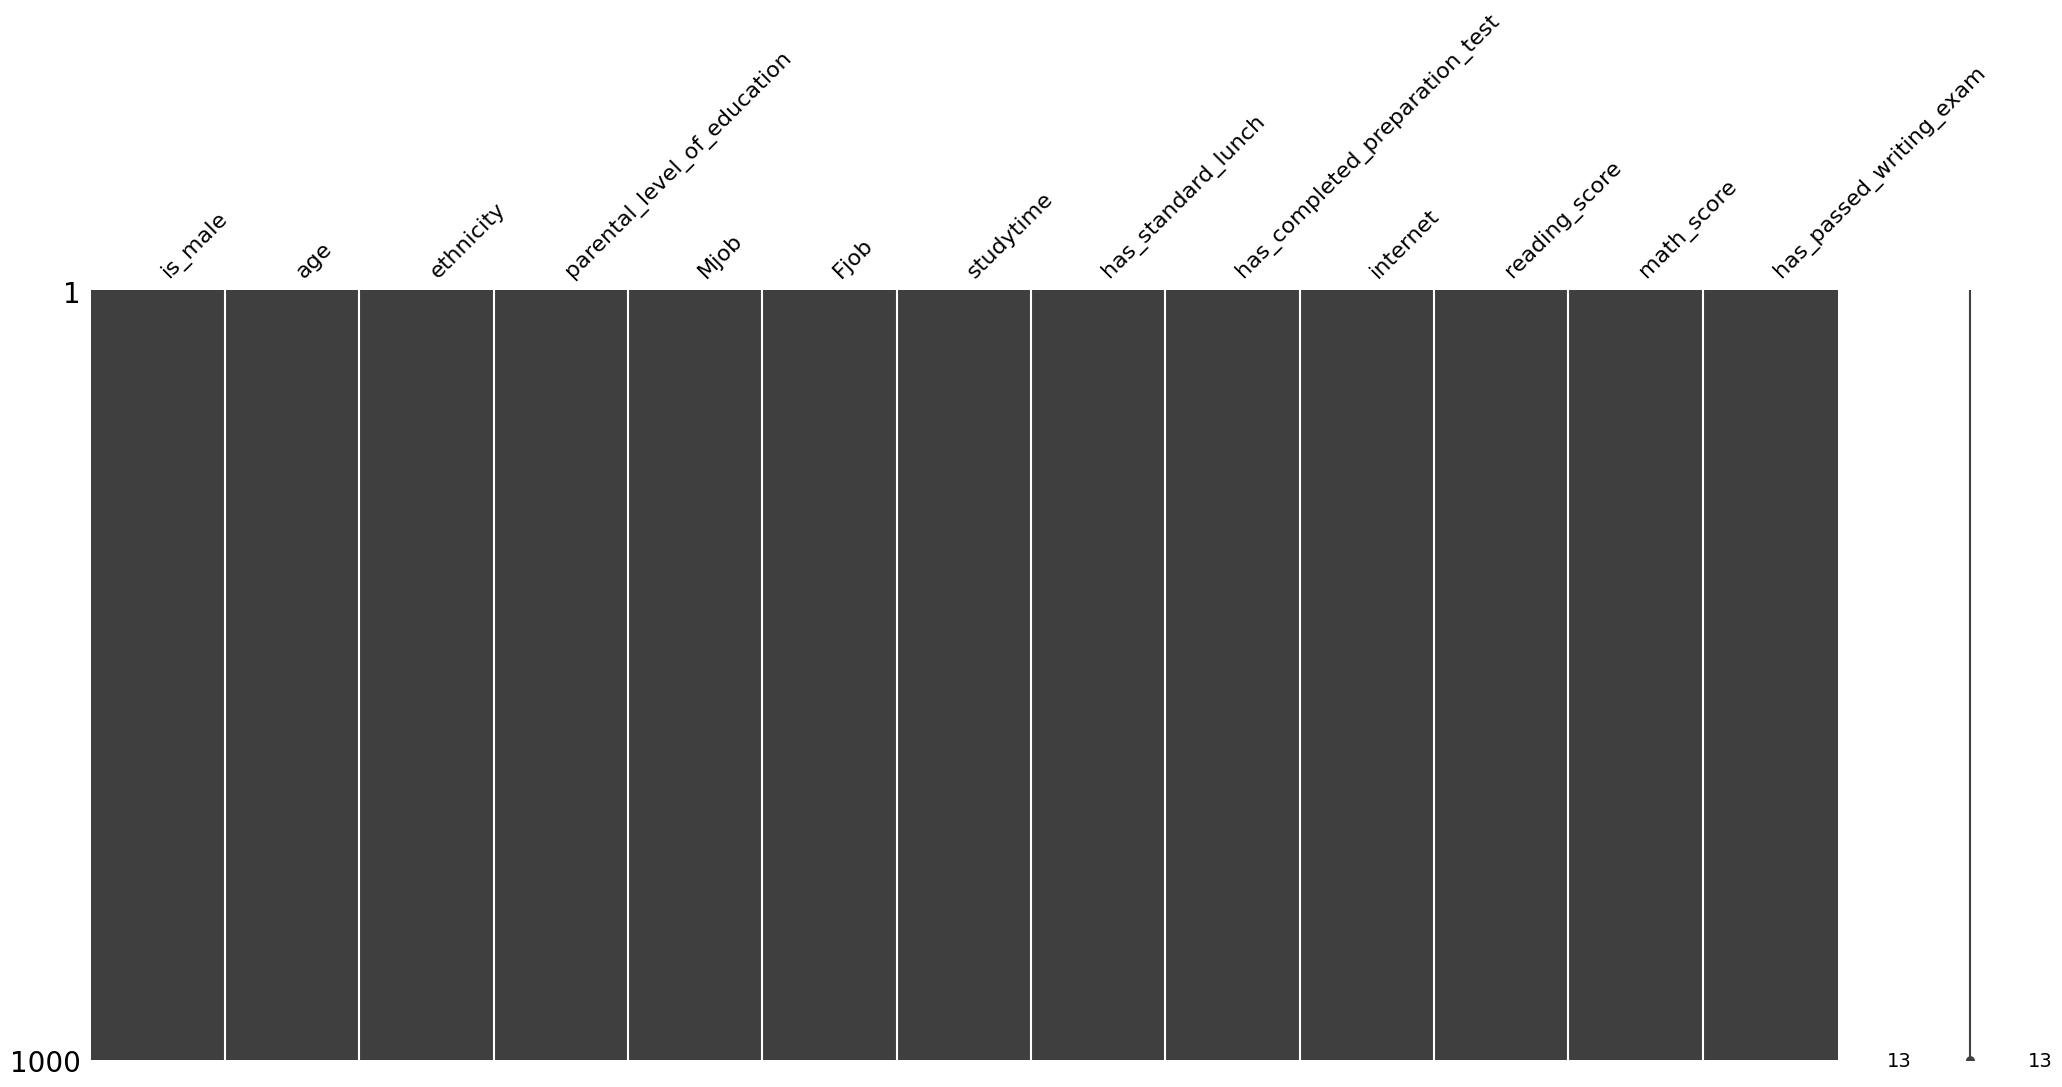

In [8]:
msno.matrix(df)

# featuring enngineering 



#### combining reading_score and math_score colum to make a new column total_score


In [9]:

df['total_score'] = (df['reading_score'] + df ['math_score'])/2

# Seperating datasets type into categorical and numerical 


In [10]:

category_column = ['ethnicity', 'Mjob', 'Fjob', 'internet']
boolean_column = ['is_male', 'has_standard_lunch', 'has_completed_preparation_test']
numerical_columns = ['age', 'parental_level_of_education', 'studytime', 'reading_score', 'math_score', 'total_score']


In [11]:
print(df[boolean_column].dtypes)


is_male                           bool
has_standard_lunch                bool
has_completed_preparation_test    bool
dtype: object


# Transform boolean columns to integers for the model to give more accuracy


In [12]:

df[boolean_column] = df[boolean_column].astype(int)


In [13]:
boolean_column

['is_male', 'has_standard_lunch', 'has_completed_preparation_test']

#  Defining the feature and the target variable 


In [45]:

X = df.drop(columns=['has_passed_writing_exam'])

y = df['has_passed_writing_exam']


In [46]:
import matplotlib.pyplot as plt

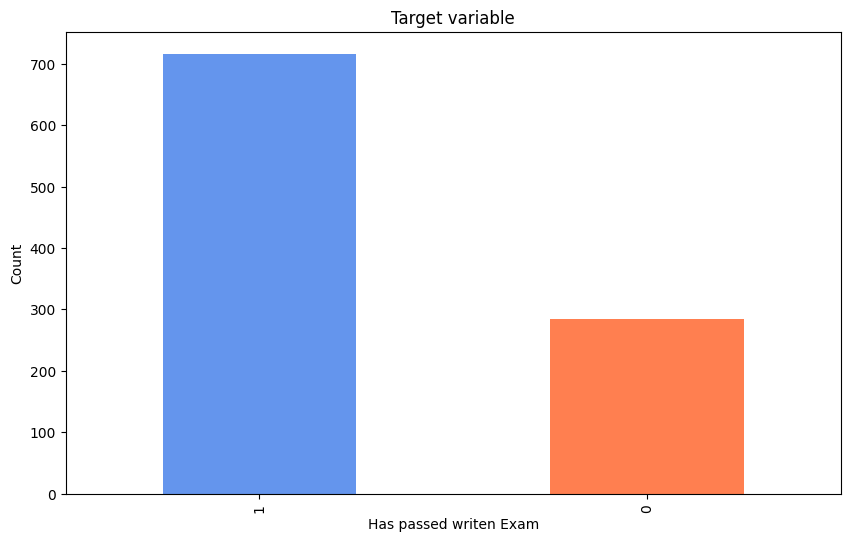

In [38]:
y = df['has_passed_writing_exam'].value_counts()

plt.figure(figsize=(10, 6))
y.plot(kind = 'bar', color=['#6495ED', '#FF7F50'])
plt.title('Target variable')
plt.xlabel('Has passed writen Exam')
plt.ylabel('Count')
plt.show()


In [39]:
y = df['has_passed_writing_exam']
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    0
Name: has_passed_writing_exam, Length: 1000, dtype: int64

# importing models for training the model for preprocessing


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


 # preprocessing columns 


In [41]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), category_column)
    ])

In [47]:
print(X.shape)  
print(y.shape)  


(1000, 13)
(1000,)


# splitting data into train and test 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
X_train.head(4)

,is_male,age,ethnicity,parental_level_of_education,Mjob,Fjob,studytime,has_standard_lunch,has_completed_preparation_test,internet,reading_score,math_score,total_score
29,1,16,group D,5,teacher,teacher,2,1,0,yes,87,90,88.5
535,1,15,group B,0,other,services,2,0,1,no,56,58,57.0
695,0,16,group D,0,teacher,other,2,1,1,no,86,69,77.5
557,0,17,group E,5,other,other,2,0,0,yes,74,60,67.0


array([[<Axes: title={'center': 'is_male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'parental_level_of_education'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'has_standard_lunch'}>,
        <Axes: title={'center': 'has_completed_preparation_test'}>],
       [<Axes: title={'center': 'reading_score'}>,
        <Axes: title={'center': 'math_score'}>,
        <Axes: title={'center': 'total_score'}>]], dtype=object)

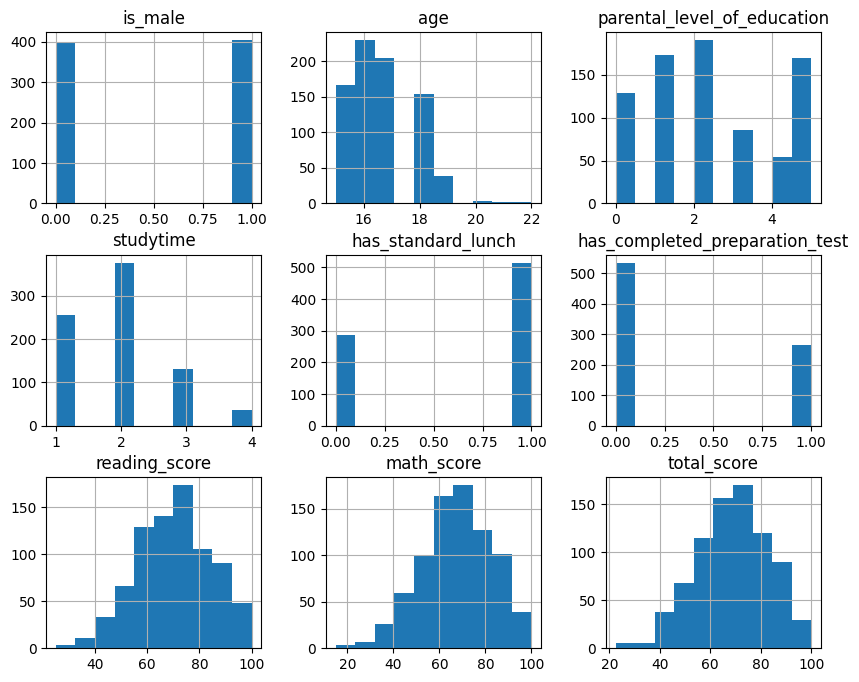

In [72]:
X_train.hist(figsize=(10, 8))


# importing piplenine for fitting the model and importing the algorithm


In [65]:

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


# building the pipeline fo fitting RandomForestClassifier


In [120]:

RF_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('RF', RandomForestClassifier(random_state=42))
])

# training the model


In [121]:

RF_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'parental_level_of_education',
                                                   'studytime', 'reading_score',
                                                   'math_score',
                                                   'total_score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ethnicity', 'Mjob', 'Fjob',
                                                   'internet'])])),
                ('RF', RandomForestClassifier(random_state=42))])

# evaluate the model


In [125]:

RF_pred = RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_pred)

In [126]:
print("Accuracy of RandomForestClassifier:", RF_accuracy)


Accuracy of RandomForestClassifier: 0.935


In [127]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        47
           1       0.95      0.97      0.96       153

    accuracy                           0.94       200
   macro avg       0.92      0.90      0.91       200
weighted avg       0.93      0.94      0.93       200



# confusion matrix 

In [128]:
RF_confusion = confusion_matrix(y_test, RF_pred)

RF_confusion

array([[ 39,   8],
       [  5, 148]])

# building the pipeline for fitting DecisionTreeClassifier



In [69]:
DT_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('DT', DecisionTreeClassifier())
])

# training the model


In [129]:

DT_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'parental_level_of_education',
                                                   'studytime', 'reading_score',
                                                   'math_score',
                                                   'total_score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ethnicity', 'Mjob', 'Fjob',
                                                   'internet'])])),
                ('DT', DecisionTreeClassifier())])

# evaluate the model


In [131]:

DT_pred = DT_model.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)

In [132]:
print("Accuracy of DecisionTreeClassifier:", DT_accuracy)

Accuracy of DecisionTreeClassifier: 0.935


In [133]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82        47
           1       0.94      0.96      0.95       153

    accuracy                           0.92       200
   macro avg       0.90      0.87      0.89       200
weighted avg       0.92      0.92      0.92       200



# confusion matrix of DecisionTreeClassifier

In [134]:
DT_confusion = confusion_matrix(y_test, DT_pred)

DT_confusion

array([[ 37,  10],
       [  6, 147]])

# SVM



#### #building pipeline for DecisionTreeClassifier

In [157]:
SVC_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('SVC', SVC(kernel='linear'))
])

In [158]:
SVC_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age',
                                                   'parental_level_of_education',
                                                   'studytime', 'reading_score',
                                                   'math_score',
                                                   'total_score']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['ethnicity', 'Mjob', 'Fjob',
                                                   'internet'])])),
                ('SVC', SVC(kernel='linear'))])

# evaluate the model


In [137]:

SVC_pred =  SVC_model.predict(X_test)
SVC_accuracy = accuracy_score(y_test, SVC_pred)

In [138]:
print("Accuracy of DecisionTreeClassifier:", SVC_accuracy)

Accuracy of DecisionTreeClassifier: 0.935


In [139]:
#SVC_report = classification_report(y_test, SVC_pred)
#SVC_report

print(classification_report(y_test, SVC_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        47
           1       0.94      0.97      0.96       153

    accuracy                           0.94       200
   macro avg       0.92      0.89      0.91       200
weighted avg       0.93      0.94      0.93       200



# confusion matrix of SVC


In [152]:
SVC_confusion = confusion_matrix(y_test, SVC_pred)

SVC_confusion

array([[ 38,   9],
       [  4, 149]])

In [153]:
models = [
    ('Random_forest', RandomForestClassifier(random_state=42)),
    ('Decision_tree', DecisionTreeClassifier()),
    ('SVC', SVC(kernel='linear'))
]

accuracies = {}

# visualizing model accuracy

In [144]:
model_accuracy = {'Random Forest': RF_accuracy, 
                  'Decision Tree': DT_accuracy,
                  'Support Vector Machine': SVC_accuracy
}

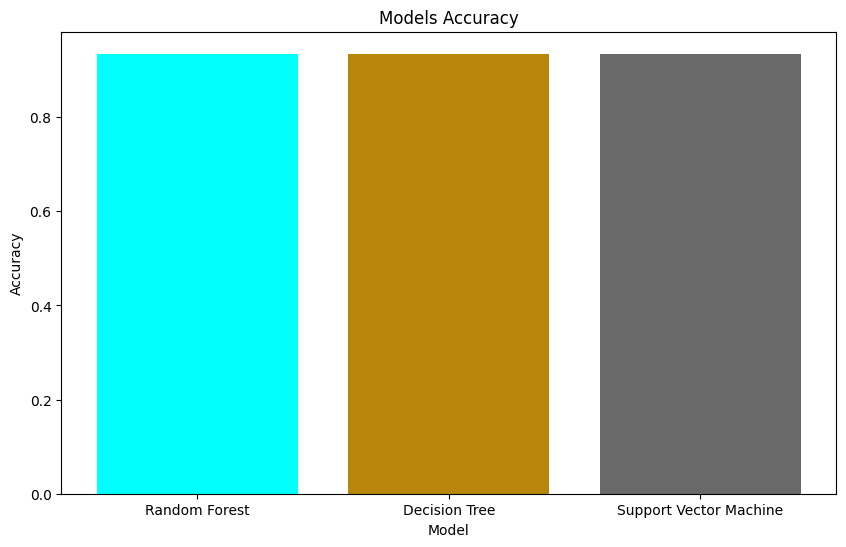

In [148]:
plt.figure(figsize=(10, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values(), color=['#00FFFF', '#B8860B', '#696969'])  
plt.title('Models Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()



# visualizing confusion matrices

#### #listing title and running the model in loop to get out put 

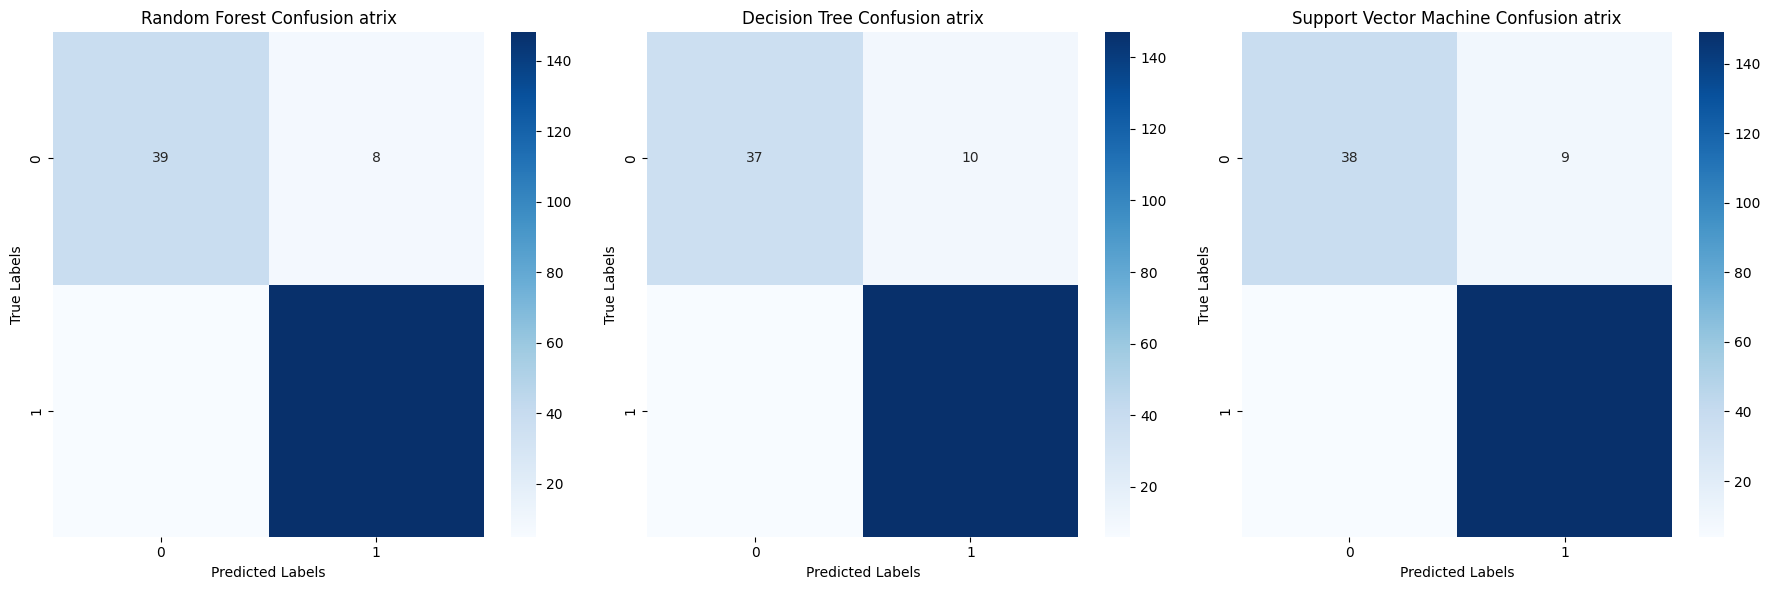

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

types = [RF_confusion, DT_confusion, SVC_confusion]
titles = ['Random Forest', 'Decision Tree', 'Support Vector Machine']

for i, condusionmatrix in enumerate(types):
    sns.heatmap(condusionmatrix, annot=True, cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{titles[i]} Confusion atrix')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()